<a href="https://colab.research.google.com/github/Nofryntii/DATAMINING/blob/main/predikasikursaud_randomforestregression%26linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [70]:
kurs = pd.read_excel('new.xlsx')
kurs

,Tanggal,KursAUD,KursMYR,KursEURO
0,2023-01-02,10625.80,3560.55,16694.78
1,2023-01-03,10651.29,3556.79,16717.18
2,2023-01-04,10632.27,3562.52,16651.90
3,2023-01-05,10735.64,3568.23,16626.82
4,2023-01-06,10689.84,3568.71,16646.59
...,...,...,...,...
109,2023-06-21,10291.94,3261.10,16542.07
110,2023-06-22,10190.52,3242.93,16431.61
111,2023-06-23,10185.97,3224.91,16488.85
112,2023-06-26,10094.38,3225.55,16390.37


## Random Forest Regression

---

In [71]:
correlation = kurs.corr(numeric_only=True)

<Axes: >

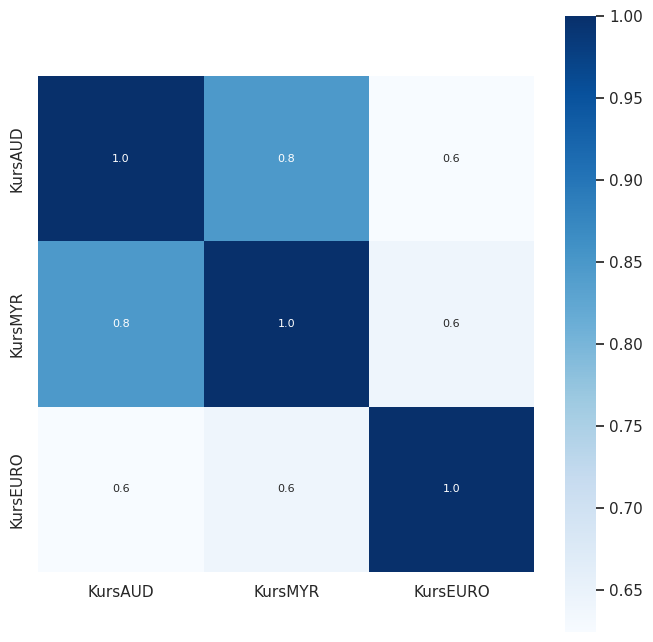

In [72]:
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size' : 8}, cmap="Blues")

<Axes: xlabel='KursAUD', ylabel='Count'>

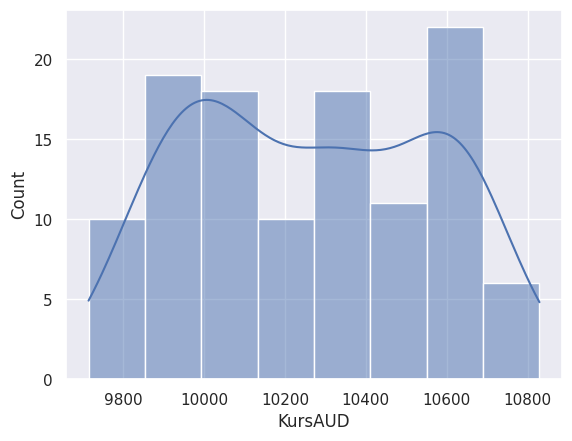

In [73]:
sns.set_theme()
sns.histplot(kurs["KursAUD"], kde=True)

In [74]:
X = kurs.drop(['Tanggal','KursAUD'],axis=1)
Y = kurs['KursAUD']
print(X)

     KursMYR  KursEURO
0    3560.55  16694.78
1    3556.79  16717.18
2    3562.52  16651.90
3    3568.23  16626.82
4    3568.71  16646.59
..       ...       ...
109  3261.10  16542.07
110  3242.93  16431.61
111  3224.91  16488.85
112  3225.55  16390.37
113  3231.57  16458.72

[114 rows x 2 columns]


In [75]:
print(Y)

0      10625.80
1      10651.29
2      10632.27
3      10735.64
4      10689.84
         ...   
109    10291.94
110    10190.52
111    10185.97
112    10094.38
113    10081.51
Name: KursAUD, Length: 114, dtype: float64


In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [77]:
regressor = RandomForestRegressor(n_estimators=100)

In [78]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [79]:
test_data_prediction = regressor.predict(X_test)

In [80]:
print(test_data_prediction)

[10638.4855 10612.287  10599.645  10672.4969 10314.9406 10241.0215
 10382.0744  9938.9408 10573.9712 10379.9922 10112.3748  9932.5529
 10190.2734  9974.0587 10606.5568 10568.513  10212.2325 10573.5055
 10565.3955 10583.4096 10556.8366 10674.5049 10686.9471]


In [81]:
print('MAPE: {:.2f}%'.format(np.mean(np.abs((Y_test - test_data_prediction) / test_data_prediction)) * 100))
print('MSE: {0:.3f}'.format(mean_squared_error(Y_test, test_data_prediction)))
print('MAE: {0:.3f}'.format(mean_absolute_error(Y_test, test_data_prediction)))
print('R^2: {0:.3f}'.format(r2_score(Y_test, test_data_prediction)))

MAPE: 0.54%
MSE: 5947.546
MAE: 55.947
R^2: 0.895


In [82]:
Y_test = list(Y_test)

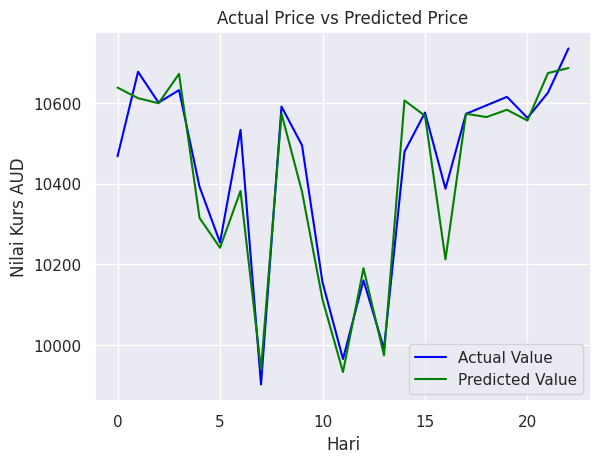

In [83]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Hari')
plt.ylabel('Nilai Kurs AUD')
plt.legend()
plt.show()

## Linear Regression
---



In [84]:
kurs['Hari'] = (kurs['Tanggal'] - kurs['Tanggal'].min()).dt.days
kurs

,Tanggal,KursAUD,KursMYR,KursEURO,Hari
0,2023-01-02,10625.80,3560.55,16694.78,0
1,2023-01-03,10651.29,3556.79,16717.18,1
2,2023-01-04,10632.27,3562.52,16651.90,2
3,2023-01-05,10735.64,3568.23,16626.82,3
4,2023-01-06,10689.84,3568.71,16646.59,4
...,...,...,...,...,...
109,2023-06-21,10291.94,3261.10,16542.07,170
110,2023-06-22,10190.52,3242.93,16431.61,171
111,2023-06-23,10185.97,3224.91,16488.85,172
112,2023-06-26,10094.38,3225.55,16390.37,175


In [85]:
X = kurs[['Hari']].values
y = kurs['KursAUD'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

In [86]:
print('MSE: {0:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('R^2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
print('MAPE: {:.2f}%'.format(np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100))

MSE: 50392.397
MAE: 172.725
R^2: 0.429
MAPE: 1.69%


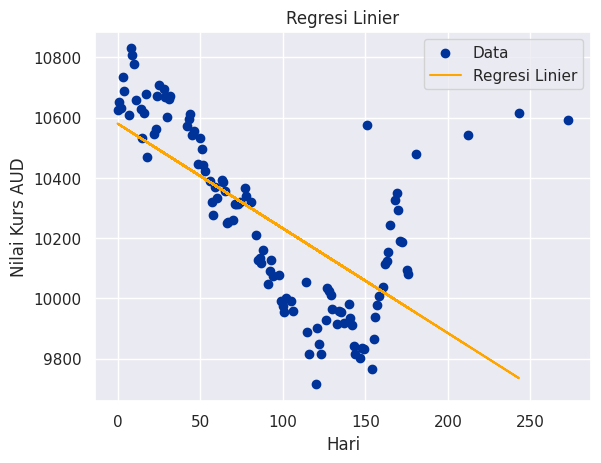

In [87]:
plt.scatter(X, y, color='#003399', label='Data')
plt.plot(X_train, y_train_pred, color='orange', label='Regresi Linier')
plt.xlabel('Hari')
plt.ylabel('Nilai Kurs AUD')
plt.legend()
plt.title('Regresi Linier')
plt.show()